In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1226,2020-08-06,United Kingdom,307409.0,307184.0,46363.0,46364.0,225.0,-1.0
1227,2020-08-06,Germany,212877.0,213067.0,9181.0,9175.0,-190.0,6.0
1228,2020-08-06,Iran,318357.0,317483.0,17835.0,17802.0,874.0,33.0
1229,2020-08-06,Turkey,235852.0,236112.0,5782.0,5784.0,-260.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4366.845653939887
RMSE =  15499.681357931217


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  289.65231519090173
RMSE =  685.8861529326334


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  26155.5
RMSE =  47103.808504214336
-- World performances for deaths --
MAE =  1564.957627118644
RMSE =  1907.6512646334568


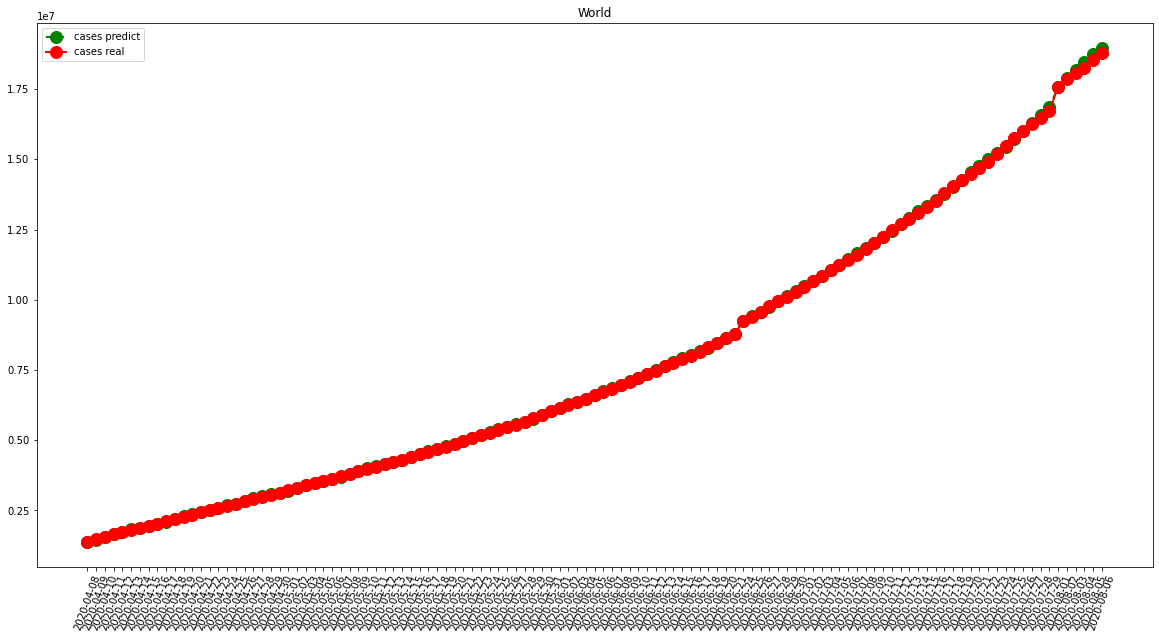

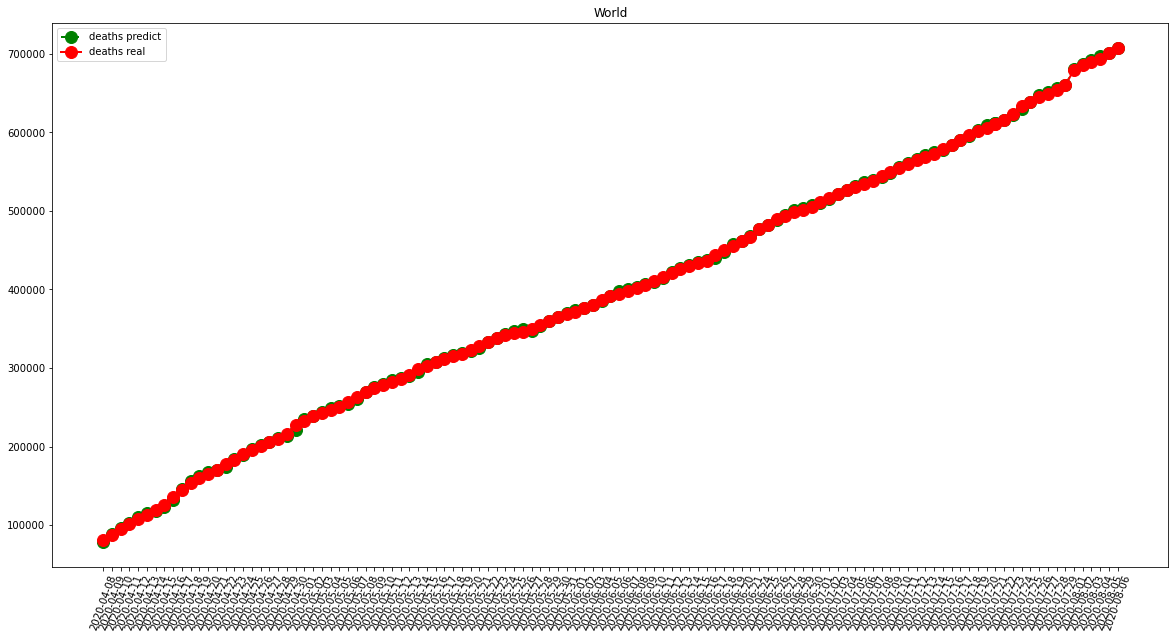

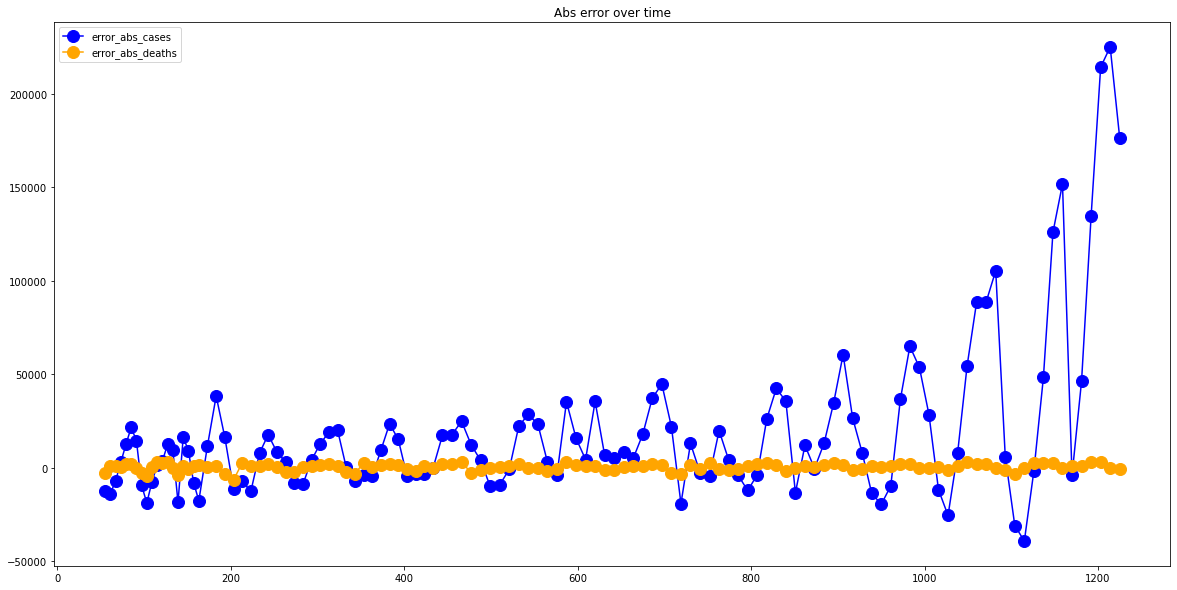

In [7]:
visShow("World")

-- France performances for cases --
MAE =  873.6171875
RMSE =  1382.1305309873956
-- France performances for deaths --
MAE =  142.09375
RMSE =  296.29524970879976


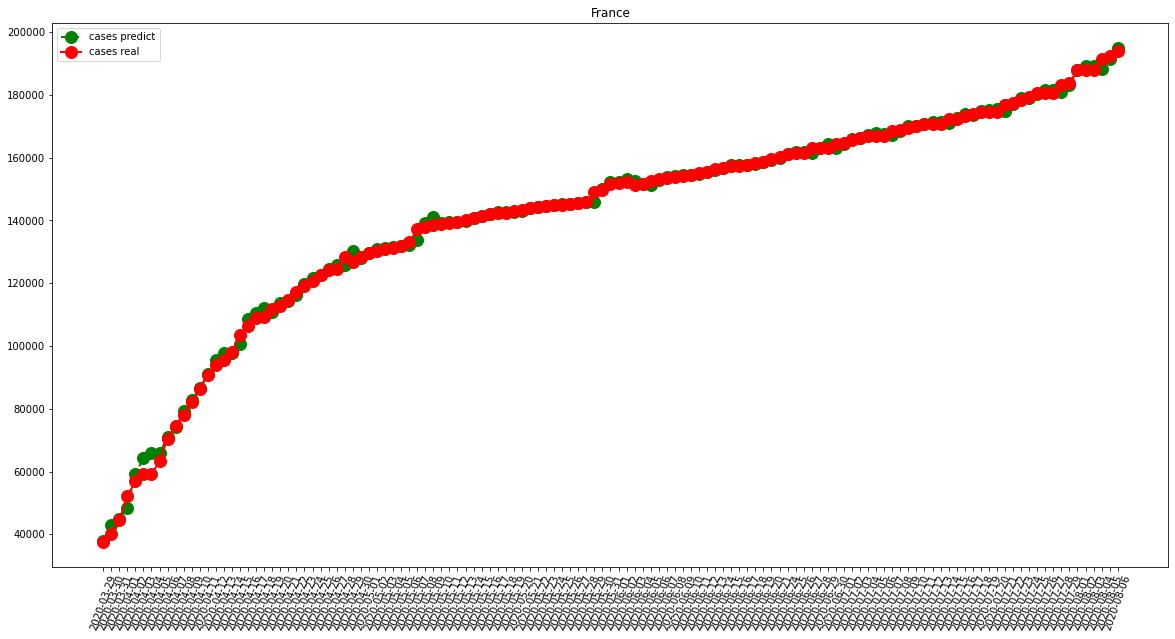

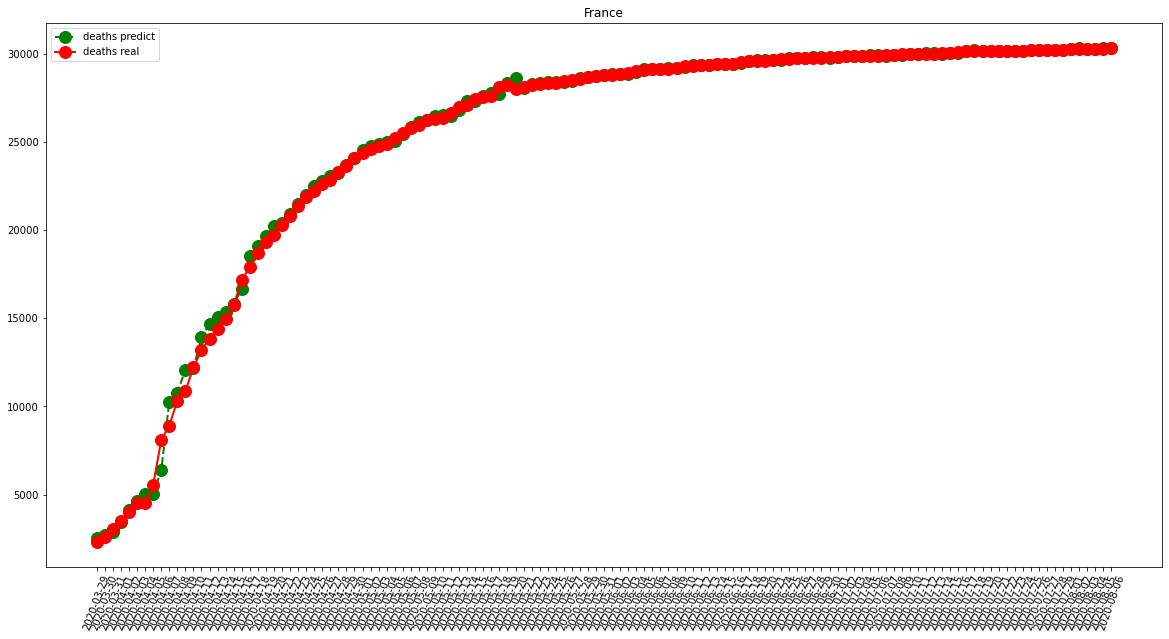

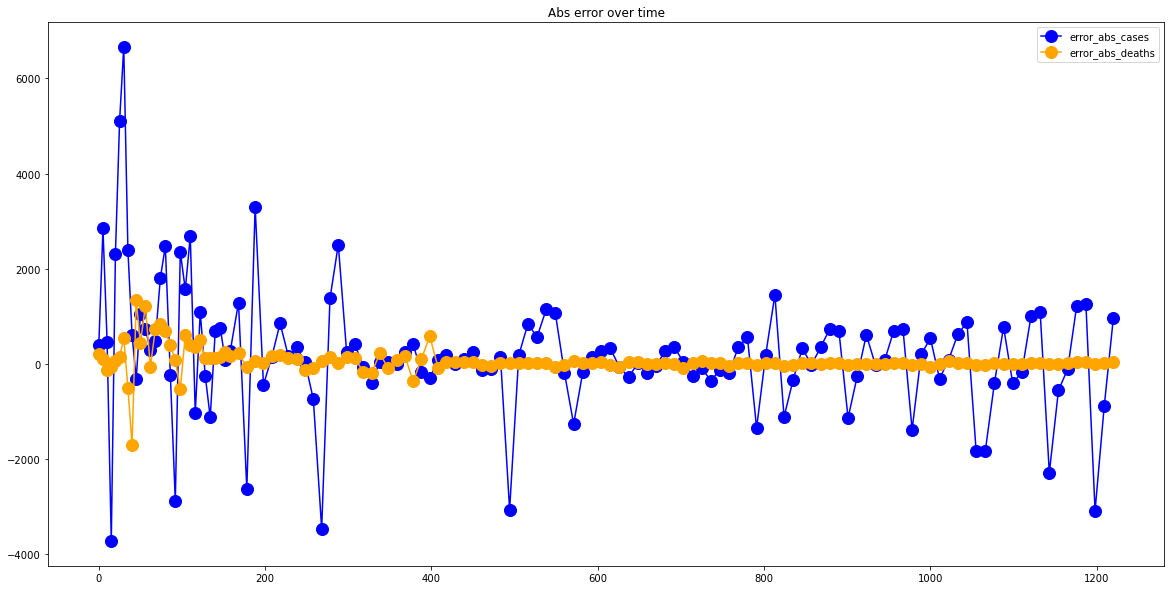

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  320.140625
RMSE =  484.542067962112
-- Italy performances for deaths --
MAE =  81.2890625
RMSE =  261.63618287136813


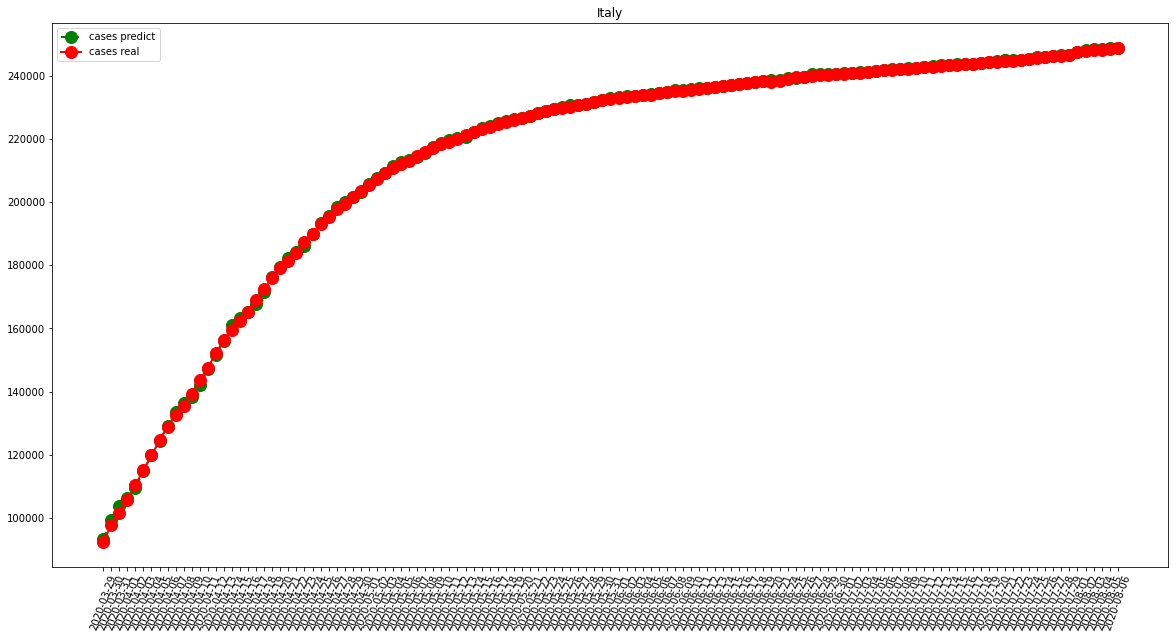

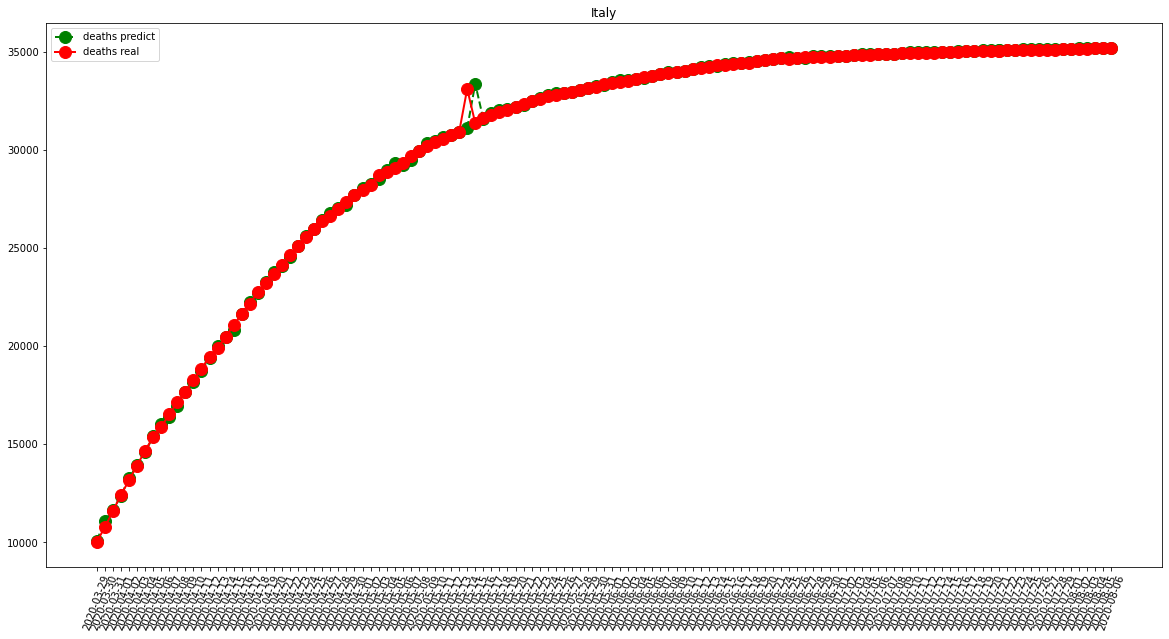

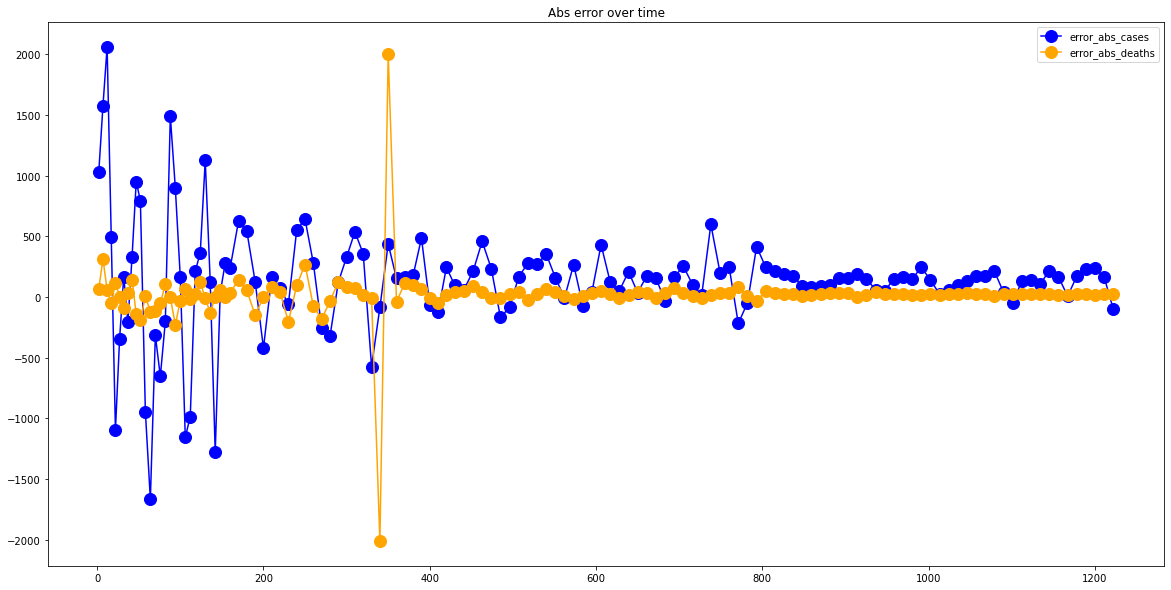

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1156.0546875
RMSE =  2286.381230856416
-- Spain performances for deaths --
MAE =  144.46875
RMSE =  358.80681170373566


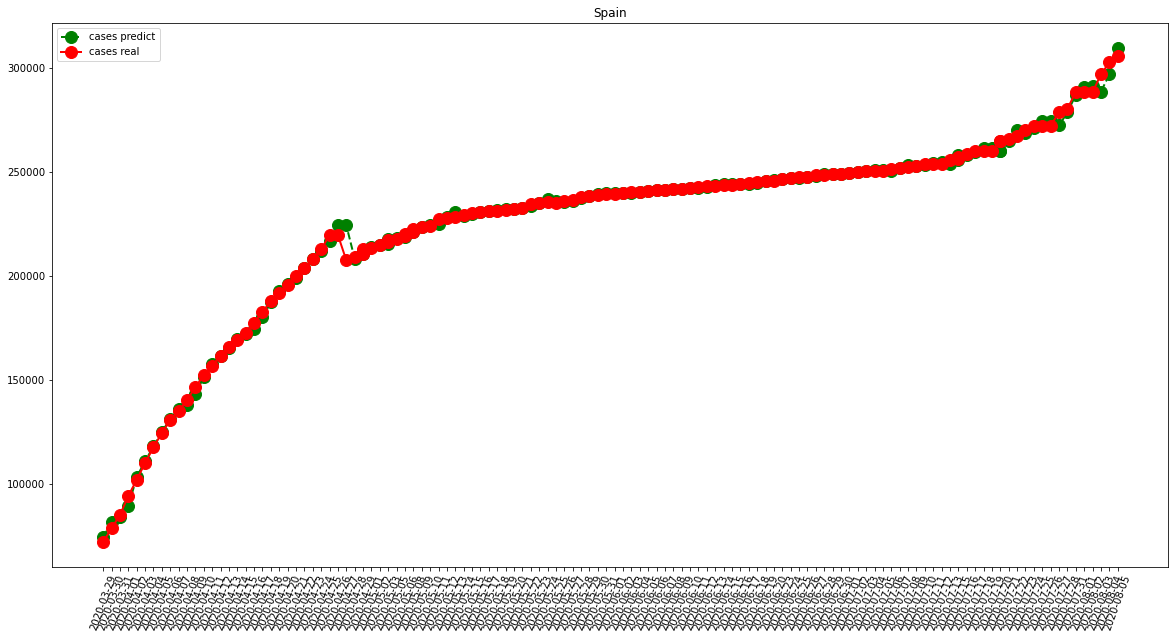

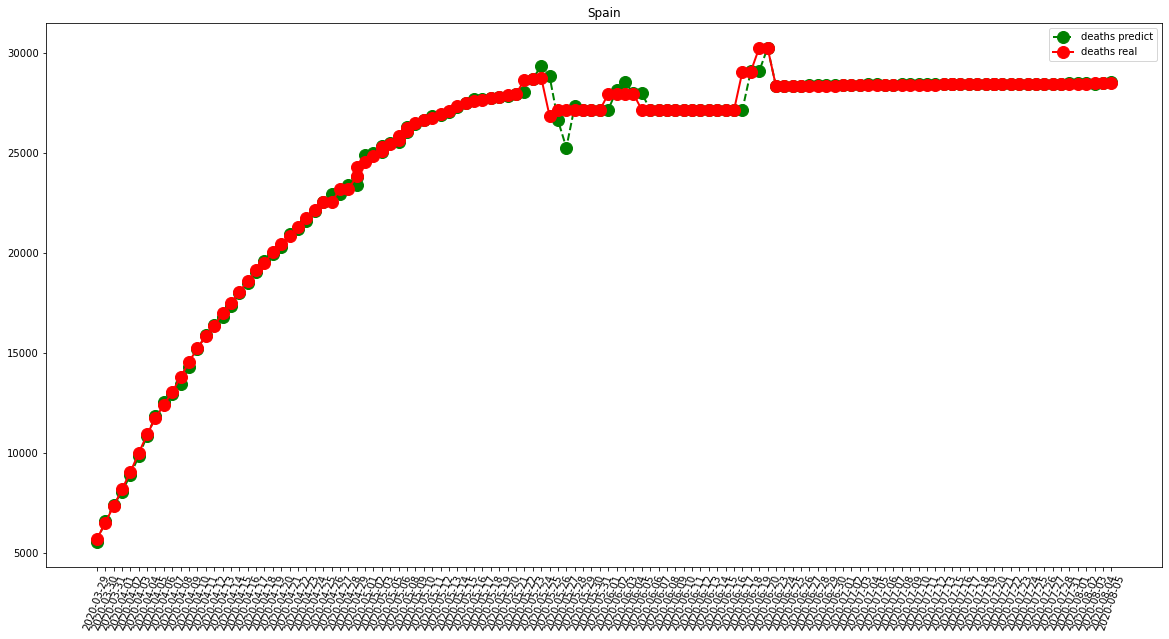

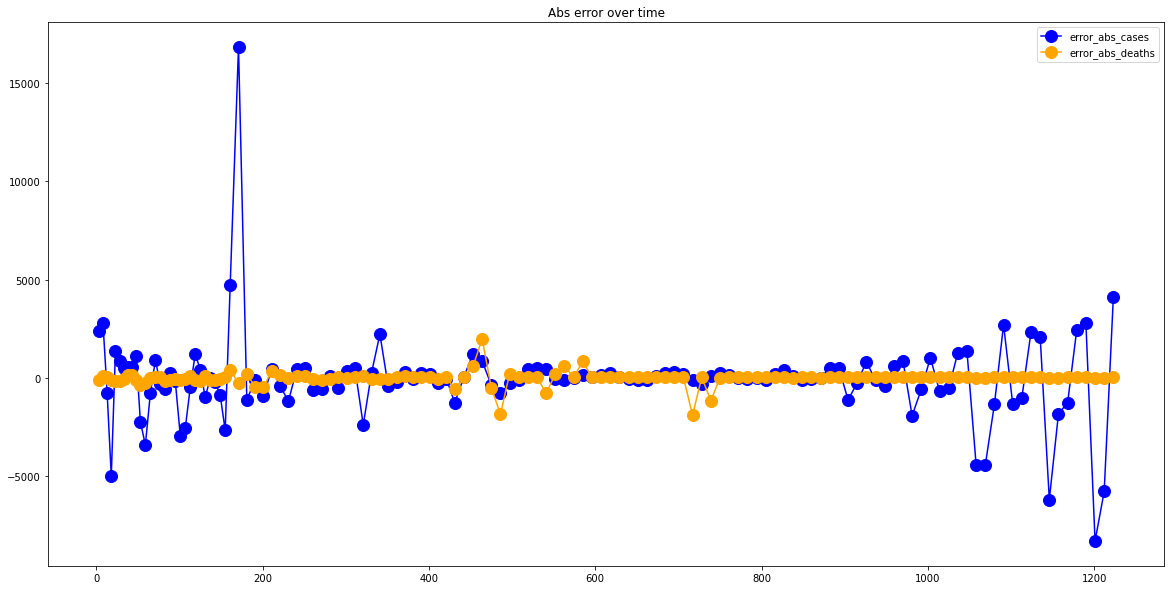

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  6732.890625
RMSE =  9752.260720276607
-- United States performances for deaths --
MAE =  505.0234375
RMSE =  724.1396565494117


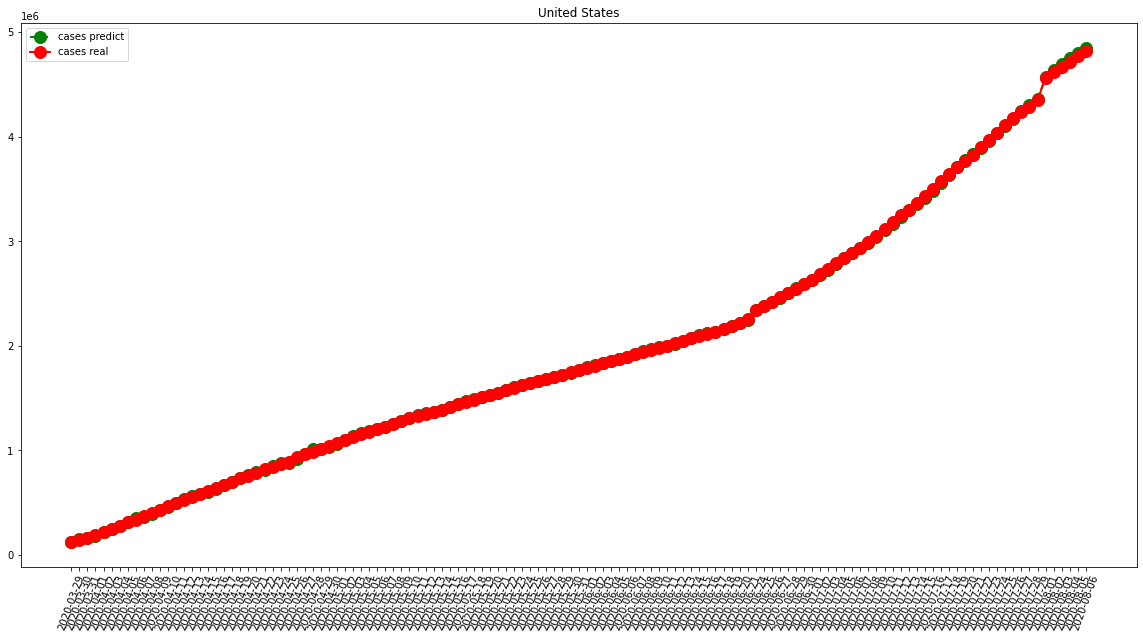

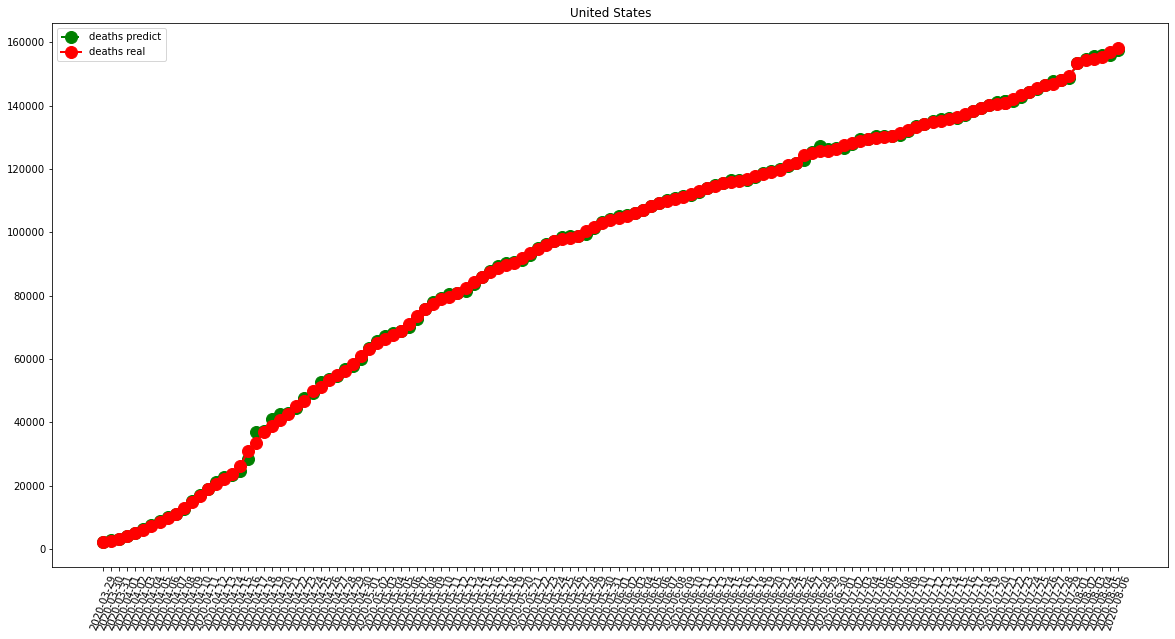

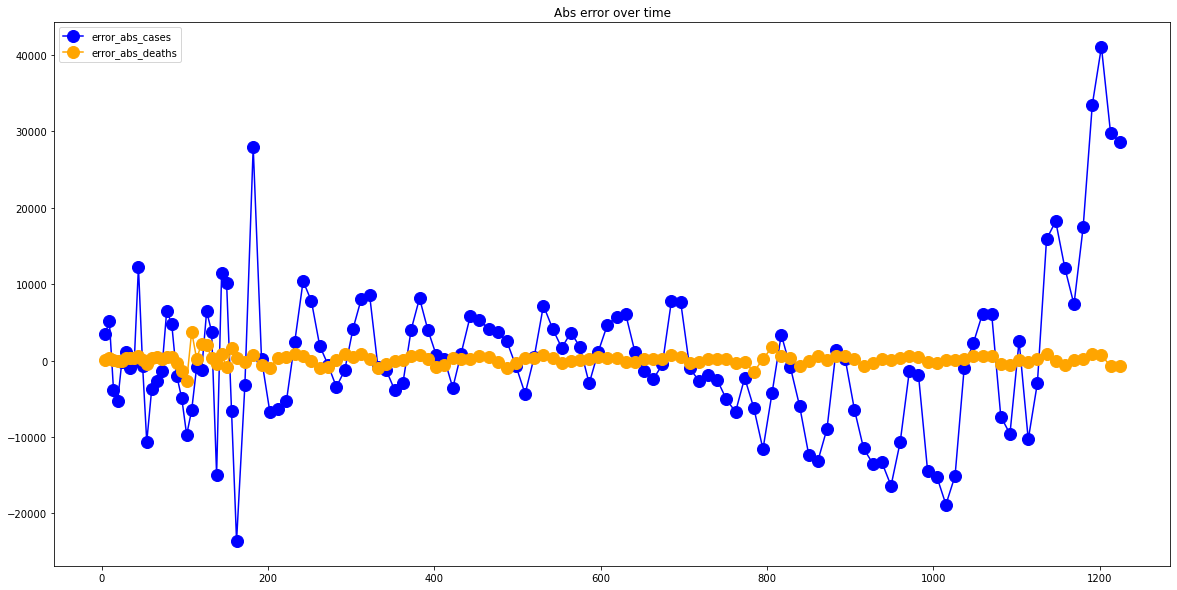

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  75.6953125
RMSE =  105.19813894504028
-- China performances for deaths --
MAE =  31.6015625
RMSE =  138.7701280445471


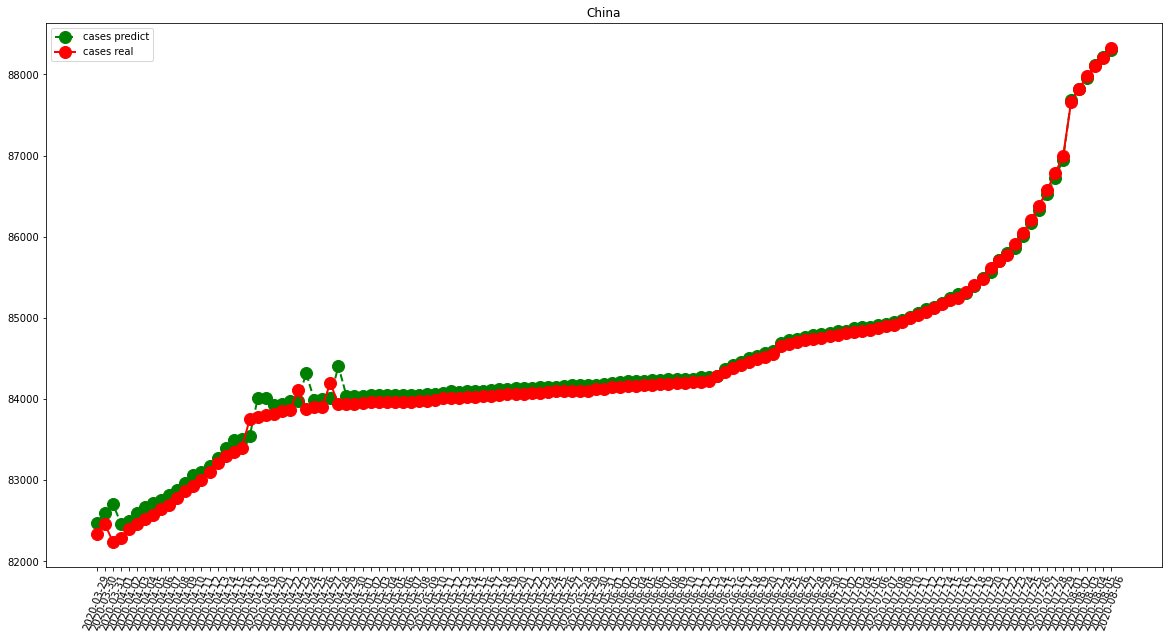

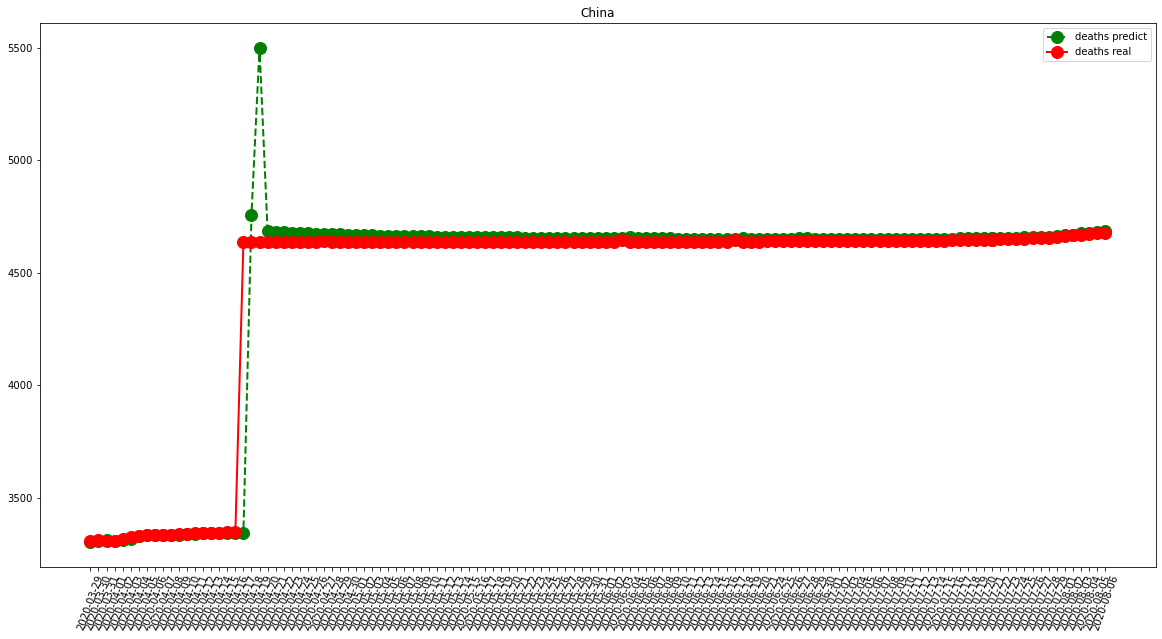

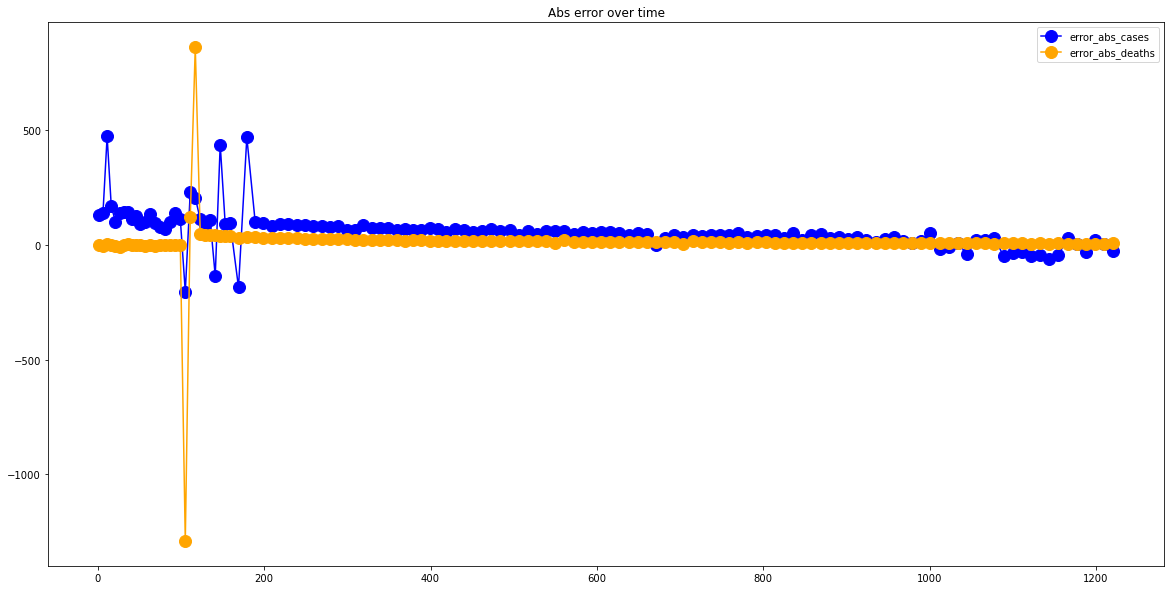

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1236.18
RMSE =  4173.941211852414
-- United Kingdom performances for deaths --
MAE =  194.27
RMSE =  491.11197297561375


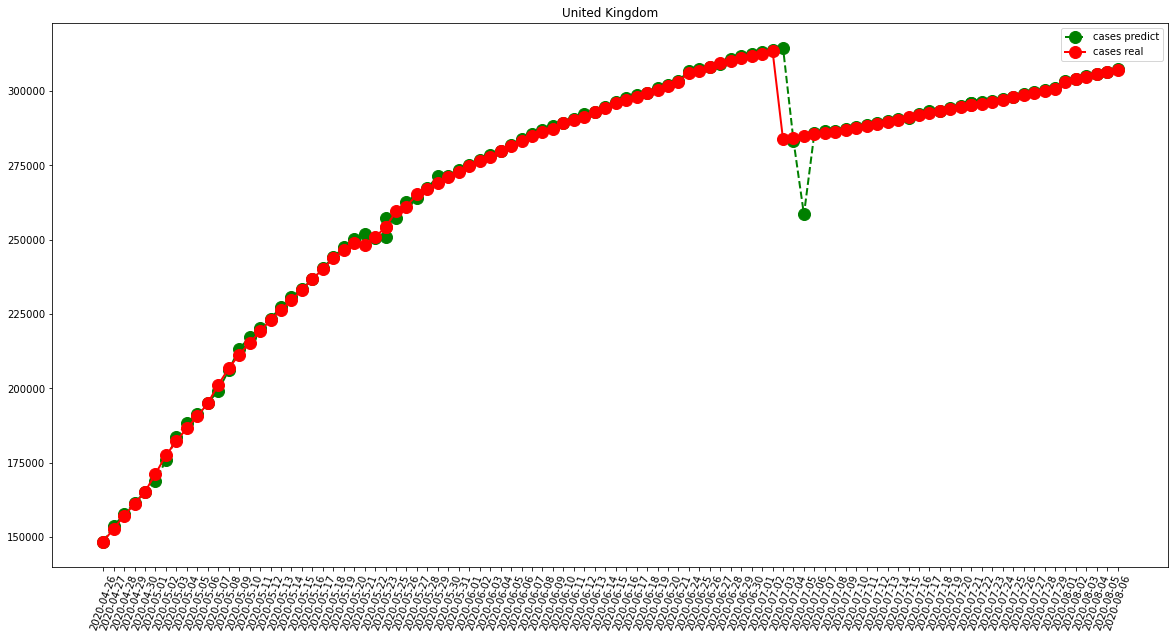

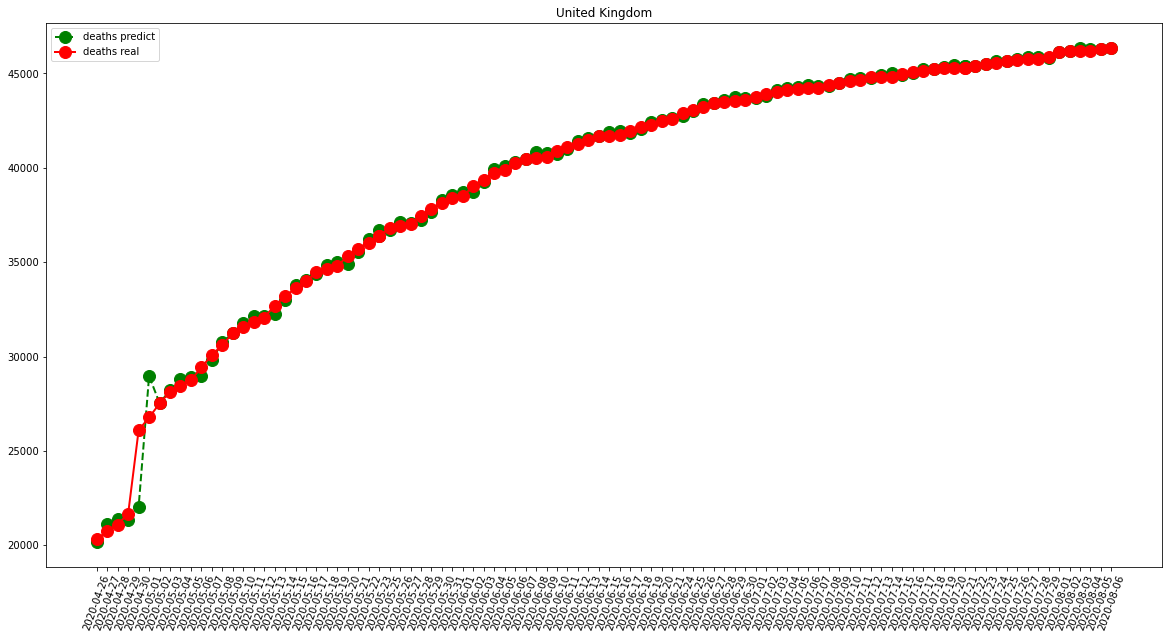

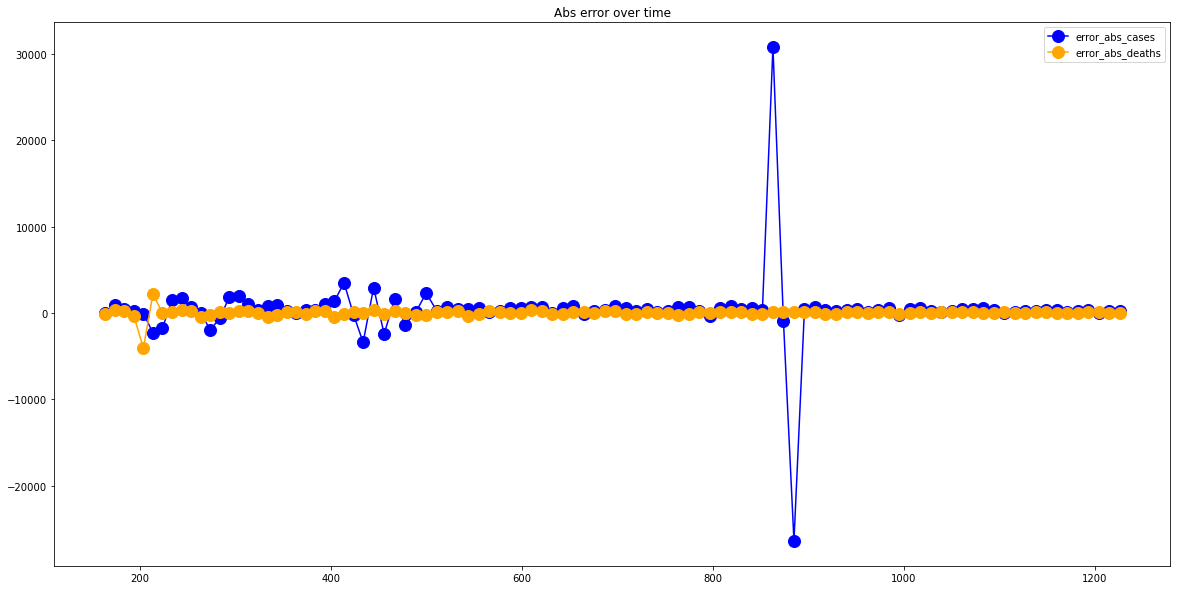

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  313.16
RMSE =  440.47501631761133
-- Germany performances for deaths --
MAE =  24.52
RMSE =  43.77213725647858


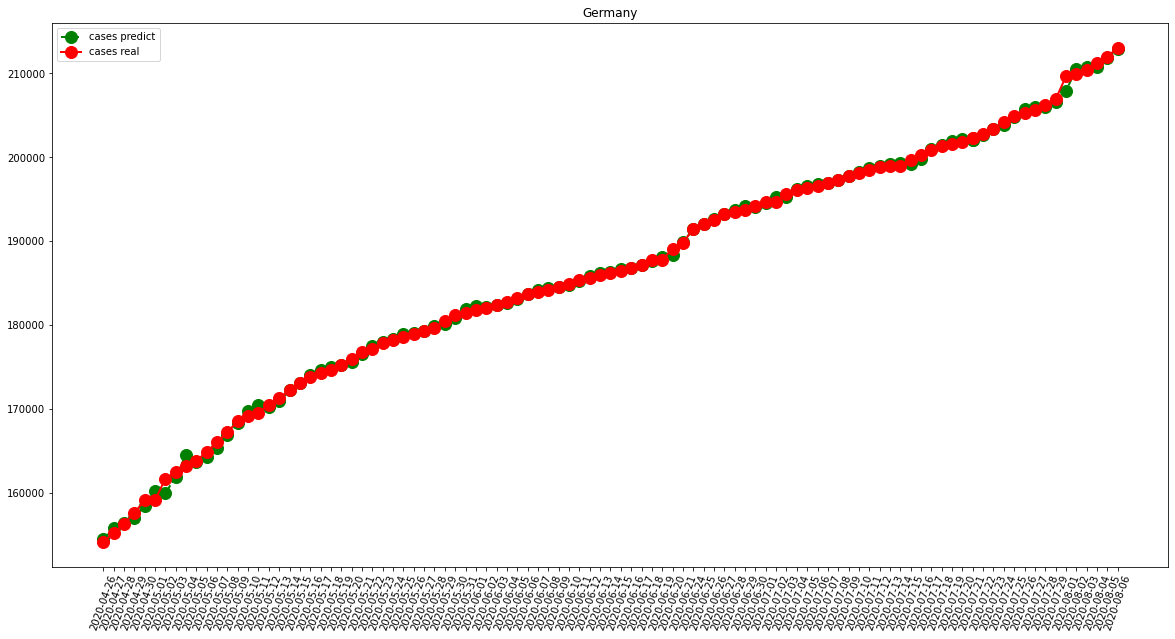

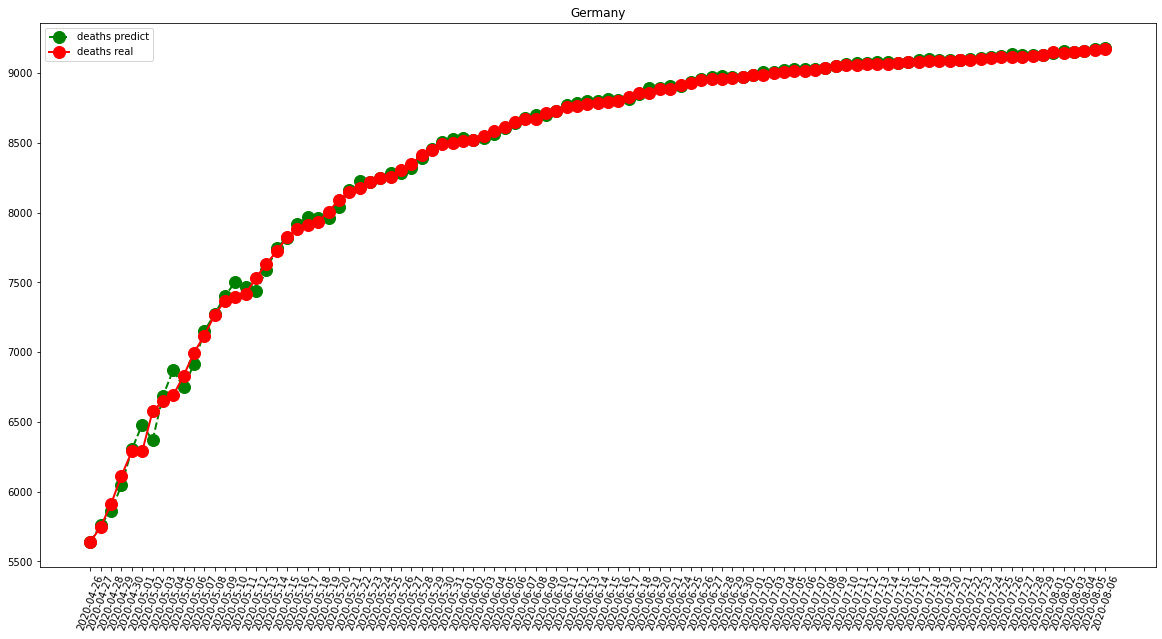

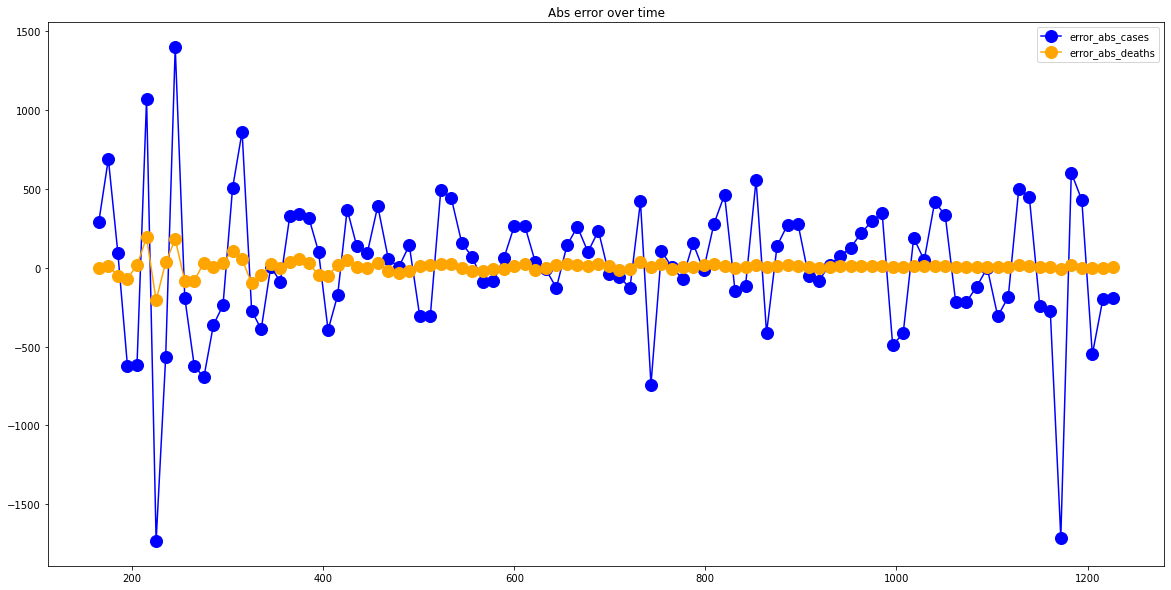

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  567.53
RMSE =  873.8251484135714
-- Iran performances for deaths --
MAE =  30.26
RMSE =  67.99029342487059


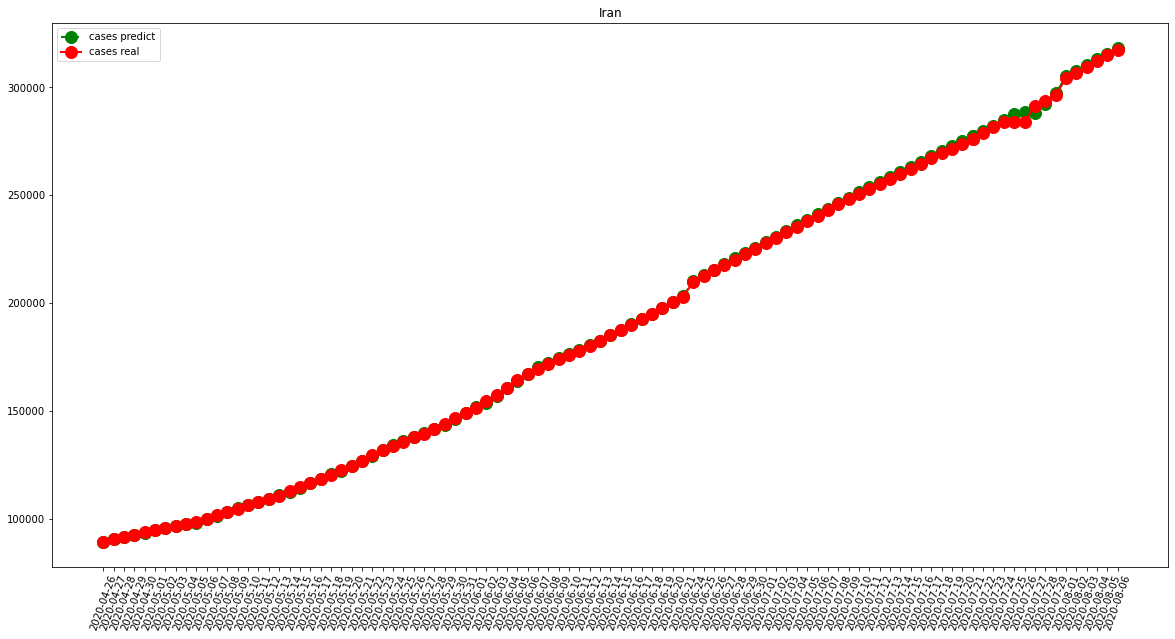

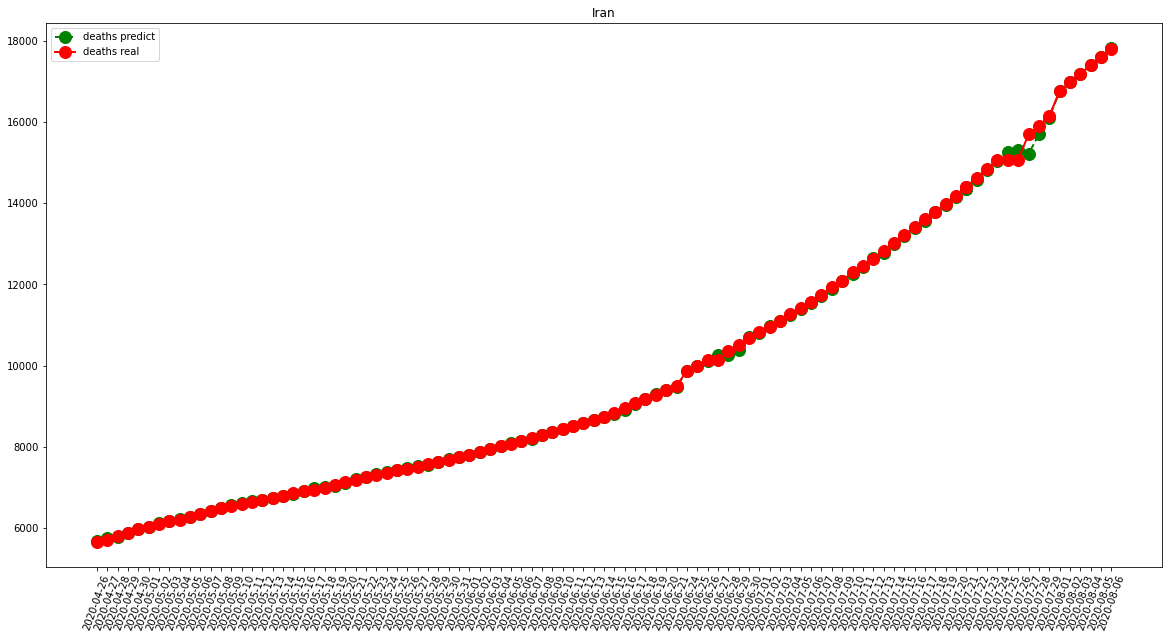

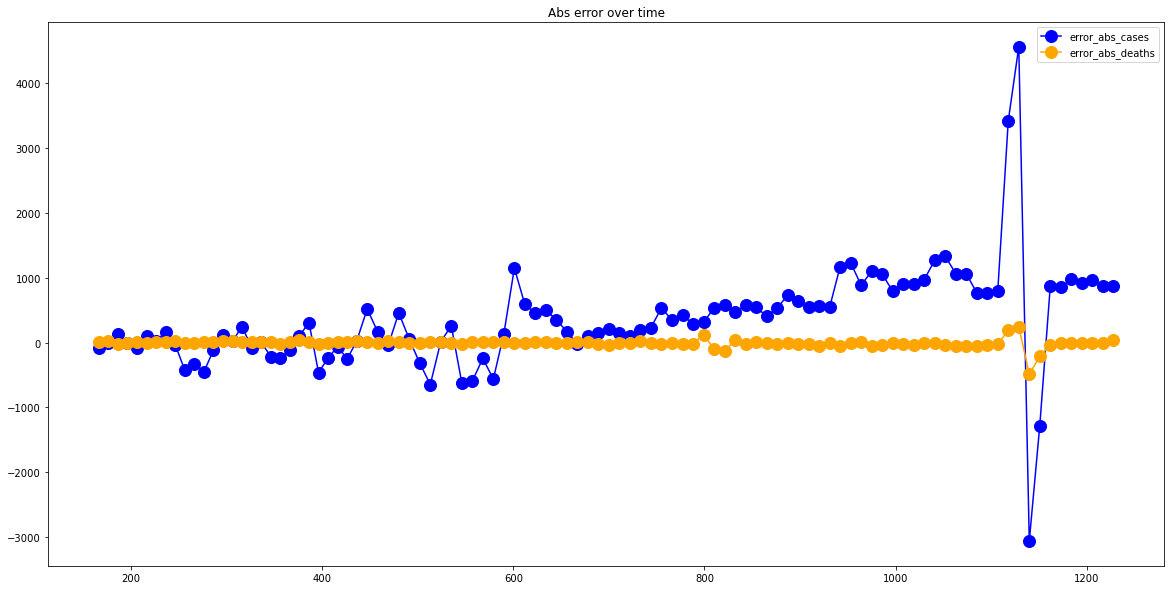

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  201.11
RMSE =  345.5586636158902
-- Turkey performances for deaths --
MAE =  18.97
RMSE =  101.51073834821615


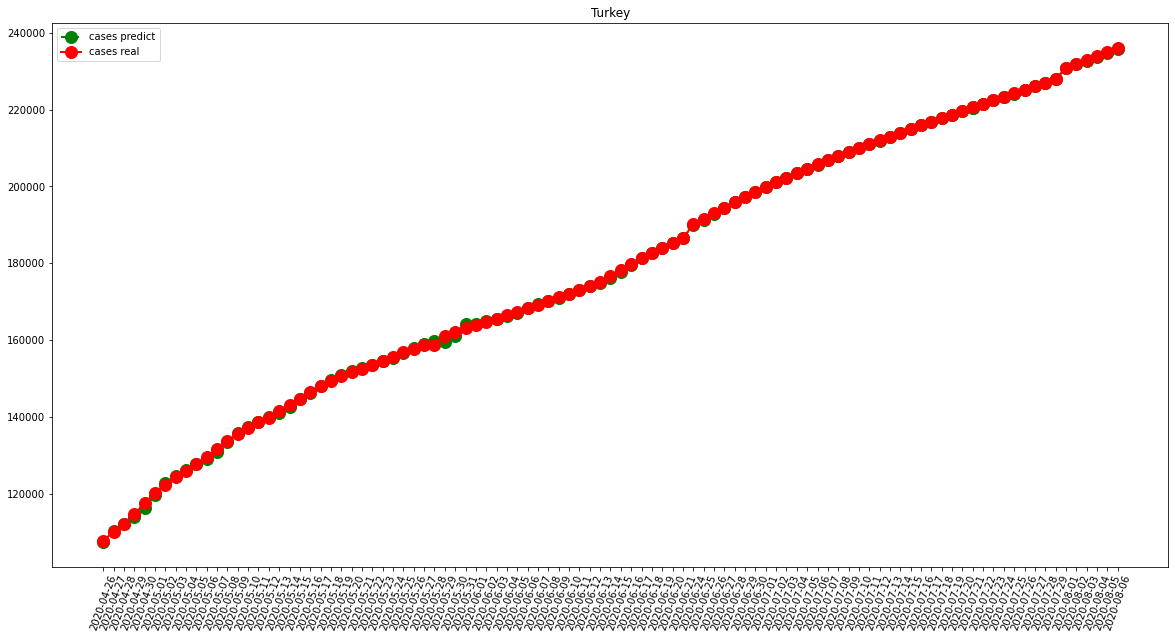

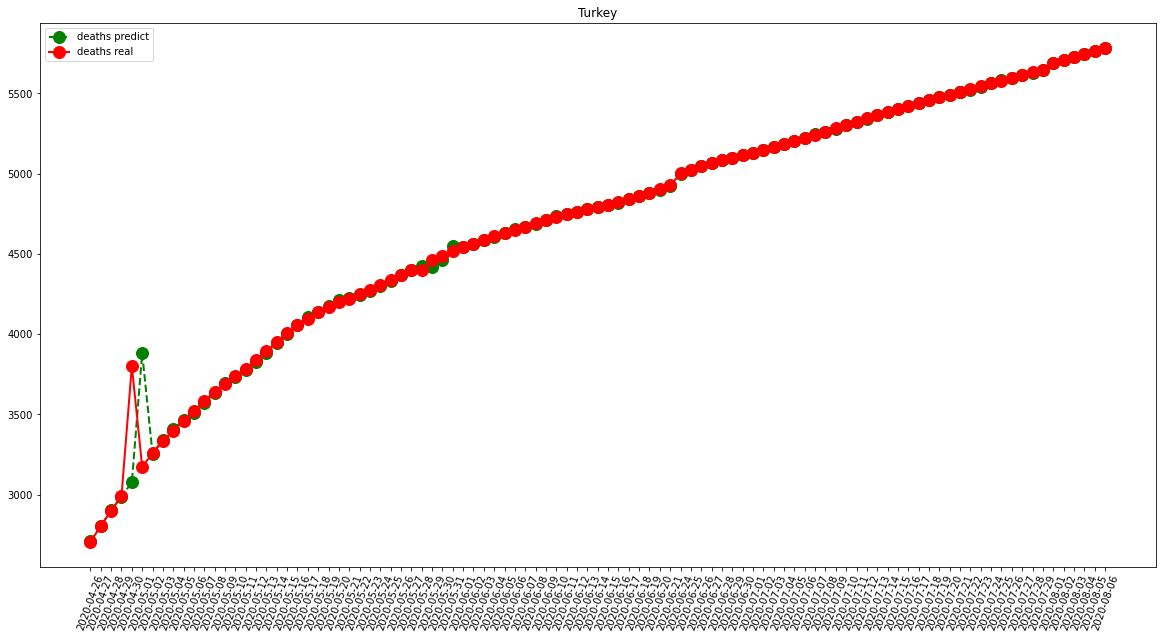

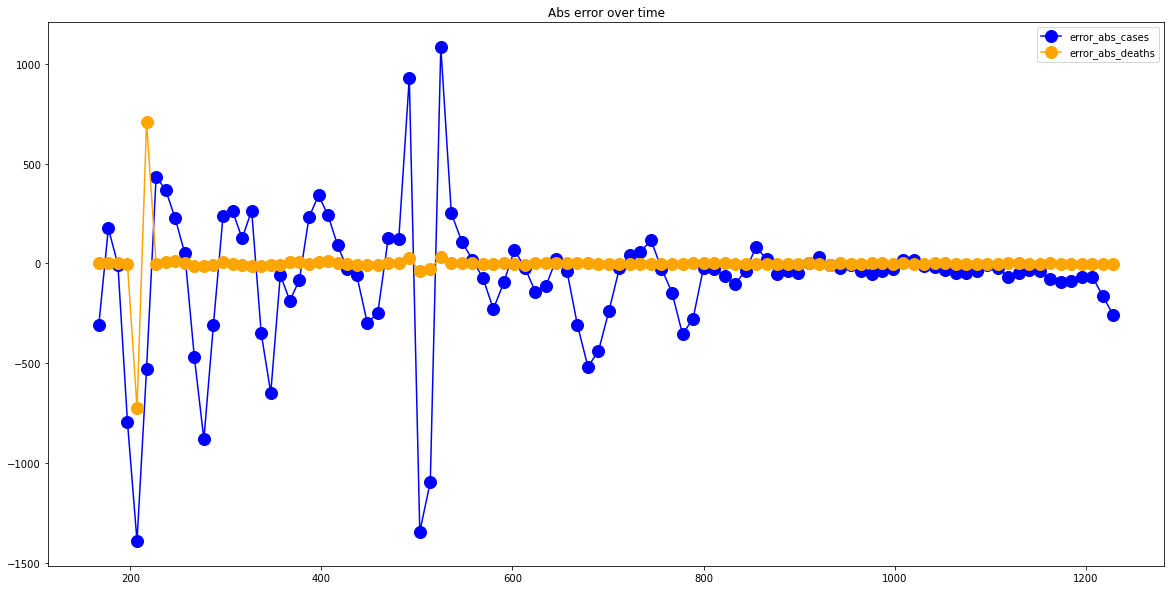

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12125.547945205479
RMSE =  16112.720687671095
-- Brazil performances for deaths --
MAE =  401.67123287671234
RMSE =  494.16654615874774


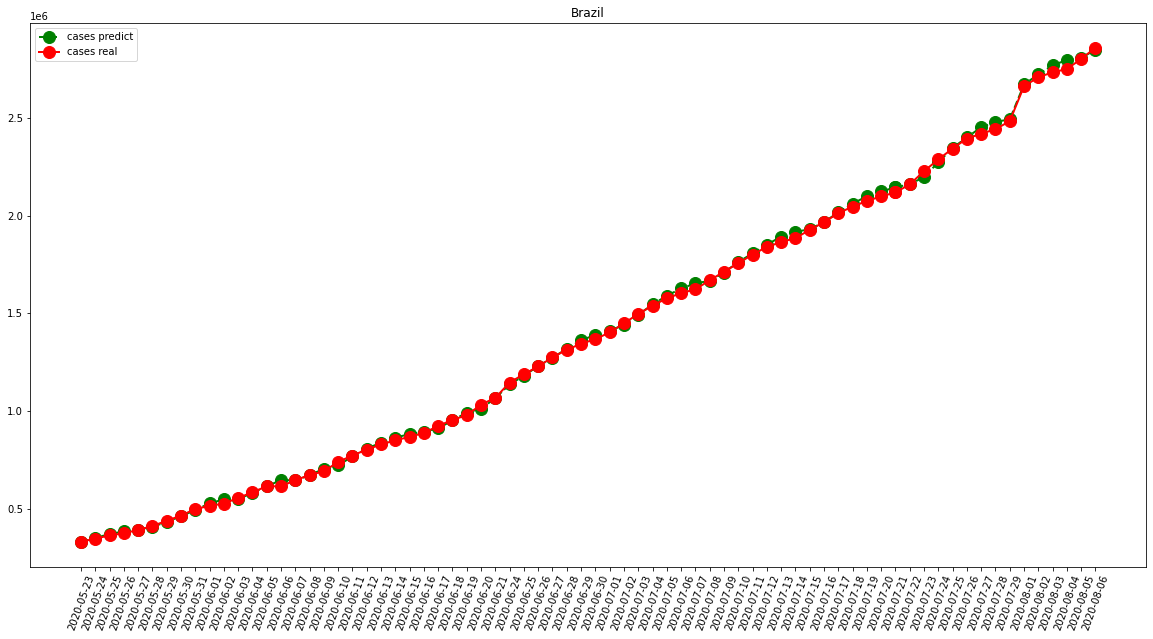

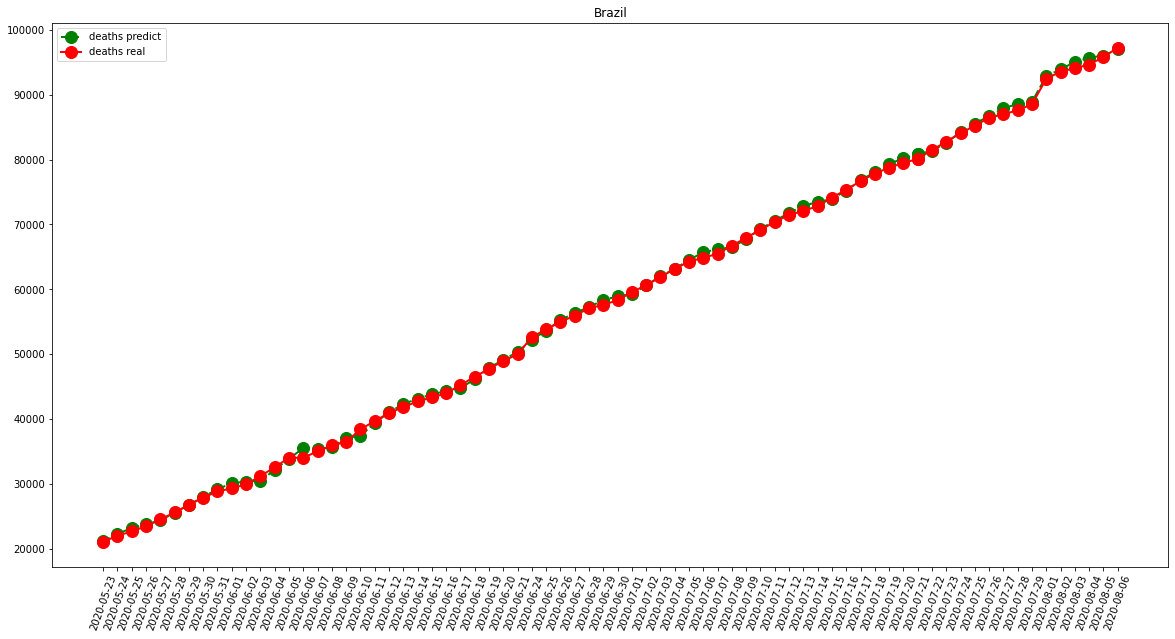

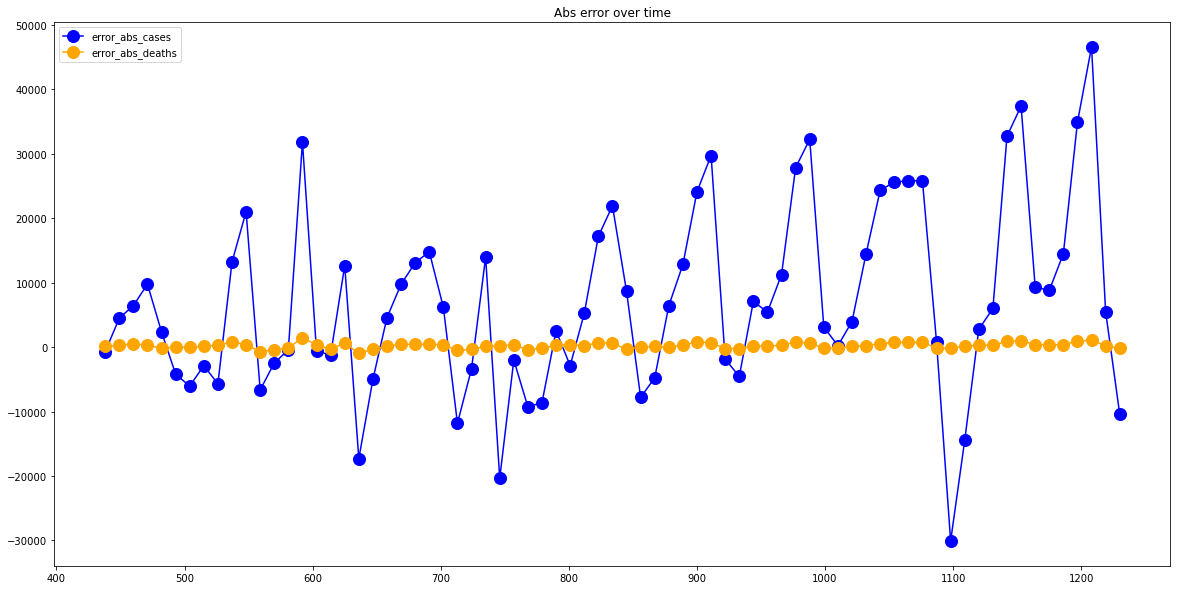

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)